In [1]:
import autonormalize as an
import featuretools as ft

In [2]:
df = ft.demo.load_mock_customer(return_single_table=True)
df

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth,brand
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18,A
1,10,1,2014-01-01 00:09:45,5,57.39,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18,A
2,495,1,2014-01-01 00:14:05,5,69.45,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18,A
3,460,10,2014-01-01 02:33:50,5,123.19,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18,A
4,302,10,2014-01-01 02:37:05,5,64.47,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18,A
5,212,10,2014-01-01 02:41:25,5,52.28,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18,A
6,440,10,2014-01-01 02:44:40,5,50.45,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18,A
7,405,15,2014-01-01 03:42:05,5,47.39,2,desktop,2014-01-01 03:41:00,13244,2012-04-15 23:31:04,1986-08-18,A
8,180,15,2014-01-01 03:48:35,5,146.81,2,desktop,2014-01-01 03:41:00,13244,2012-04-15 23:31:04,1986-08-18,A
9,220,16,2014-01-01 03:55:05,5,135.48,2,desktop,2014-01-01 03:49:40,13244,2012-04-15 23:31:04,1986-08-18,A


In [3]:
deps = an.find_dependencies(df)

100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


In [4]:
print(deps)

 {transaction_time}  --> transaction_id
 {transaction_id}  {session_start}  {transaction_time}  {amount}  --> session_id
 {transaction_id}  --> transaction_time
 {transaction_id}  {transaction_time}  {amount}  --> product_id
 {transaction_id}  {transaction_time}  --> amount
 {transaction_id}  {date_of_birth}  {session_start}  {amount}  {join_date}  {transaction_time}  {session_id}  --> customer_id
 {transaction_id}  {session_start}  {amount}  {transaction_time}  {session_id}  --> device
 {transaction_id}  {transaction_time}  {amount}  {session_id}  --> session_start
 {transaction_id}  {date_of_birth}  {session_start}  {amount}  {join_date}  {transaction_time}  {customer_id}  {session_id}  --> zip_code
 {transaction_id}  {date_of_birth}  {session_start}  {amount}  {transaction_time}  {customer_id}  {session_id}  --> join_date
 {transaction_id}  {session_start}  {amount}  {join_date}  {transaction_time}  {customer_id}  {session_id}  --> date_of_birth
 {transaction_id}  {product_id}  {tra

In [5]:
entityset = an.make_entityset(df, deps, name="Customer Transactions", time_index='transaction_time')

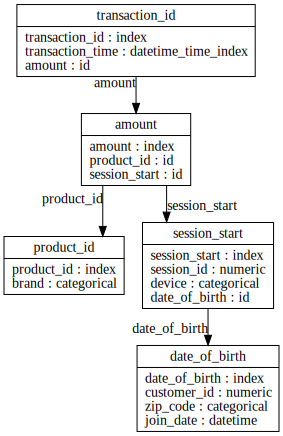

In [6]:
entityset.plot()

In [7]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='amount')
features

[<Feature: product_id>,
 <Feature: session_start>,
 <Feature: COUNT(transaction_id)>,
 <Feature: session_start.session_id>,
 <Feature: session_start.device>,
 <Feature: session_start.date_of_birth>,
 <Feature: product_id.brand>,
 <Feature: NUM_UNIQUE(transaction_id.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.WEEKDAY(transaction_time))>,
 <Feature: MODE(transaction_id.DAY(transaction_time))>,
 <Feature: MODE(transaction_id.YEAR(transaction_time))>,
 <Feature: MODE(transaction_id.MONTH(transaction_time))>,
 <Feature: MODE(transaction_id.WEEKDAY(transaction_time))>,
 <Feature: session_start.COUNT(amount)>,
 <Feature: session_start.NUM_UNIQUE(amount.product_id)>,
 <Feature: session_start.MODE(amount.product_id)>,
 <Feature: session_start.COUNT(transaction_id)>,
 <Feature: session_start.date_of_birth.customer_id>,
 <Feature: session_start.date_of_b